In [1]:
#https://www.kaggle.com/faressayah/linear-regression-house-price-prediction
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Import dataset
df = pd.read_csv('USA_Housing.csv')
df.shape

(5000, 7)

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Text(0.5, 1.0, ' Avg Area Income vs Price ')

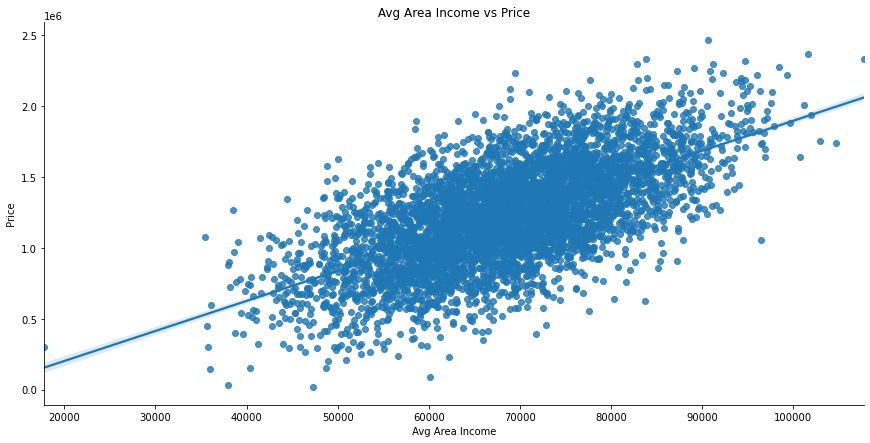

In [4]:
# Price is the dependent varaible and should be predicted
# draw line plot using seaborn to find relationship between Avg.Area Income vs Price
sns.lmplot(x='Avg. Area Income',y='Price',data=df,aspect=2,height=6)
plt.xlabel(' Avg Area Income ')
plt.ylabel(' Price ')
plt.title( ' Avg Area Income vs Price ')

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
#check for missing values
df.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [8]:
df.isnull().values.any()

False

Text(0.5, 1.0, 'Missing value in dataset')

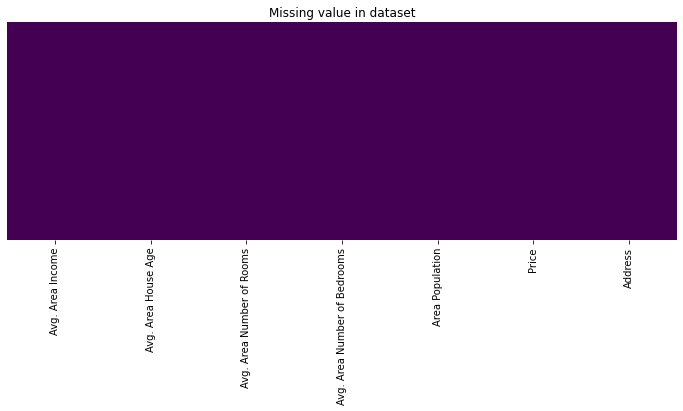

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in dataset')

<AxesSubplot:>

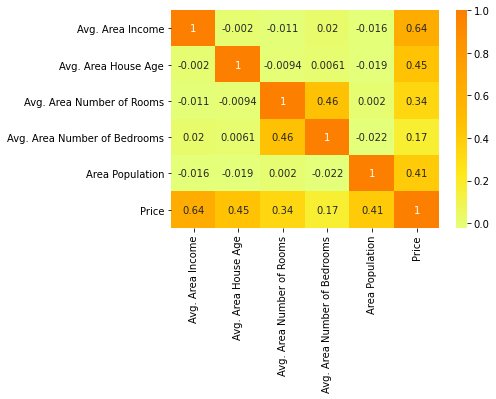

In [10]:
#correlation plot
corr = df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
#to check correlated features
correlated_features = set()
correlation_matrix = df.drop('Price',axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [13]:
correlated_features

set()

In [12]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = df['Price']

In [13]:
#calculate VIF to detect Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]
print(vif_data)

                        feature        VIF
0              Avg. Area Income  29.650899
1           Avg. Area House Age  27.447775
2     Avg. Area Number of Rooms  45.257291
3  Avg. Area Number of Bedrooms  14.537873
4               Area Population  12.825450


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price')

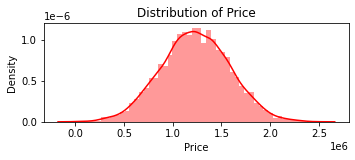

In [14]:
f = plt.figure(figsize=(12,4))
ax=f.add_subplot(221)
sns.distplot(df['Price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Price')



Text(0.5, 1.0, 'Scatter plot of Avg Area Income vs Price')

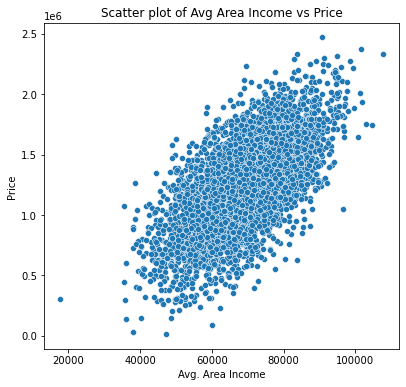

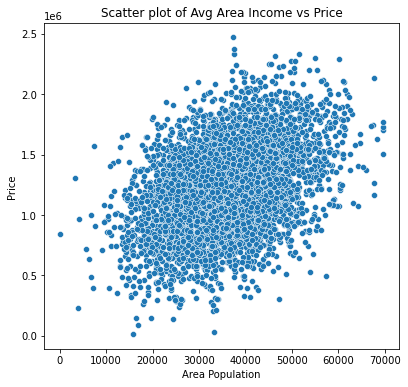

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Avg. Area Income',y='Price',data=df,palette='magma',ax=ax)
ax.set_title("Scatter plot of Avg Area Income vs Price")

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='Area Population',y='Price',data=df,palette='viridis',ax=ax)
ax.set_title("Scatter plot of Avg Area Income vs Price")

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 23)

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [18]:
## Model building - Scikit learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
# Evaluation
#sklearn regression module
y_pred = lin_reg.predict(X_test)
#Evaluation - MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred,y_test)

R_Square_sk = lin_reg.score(X_test,y_test)
print('Mean squared error :', J_mse_sk)
print('R square error :', R_Square_sk)

Mean squared error : 10409338863.756954
R square error : 0.9118846616995607


In [20]:
VIF = 1/(1-R_Square_sk)

In [21]:
VIF

11.34876196684834

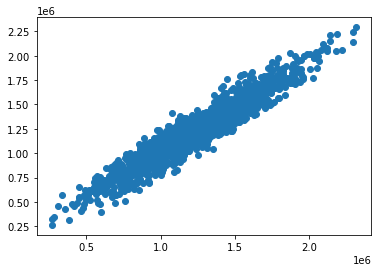

In [22]:
plt.scatter(y_test,y_pred)